In [1]:
import numpy as np
from tslearn.metrics import dtw, dtw_path
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import os
from os.path import join
from scipy import interpolate
import seaborn as sns
from hmmlearn.hmm import MultinomialHMM,GMMHMM,GaussianHMM

In [2]:
def rfile(filename):
    x=[]
    y=[]
    z=[]
    with open(filename,"r") as inFile:
        for line in inFile:
            message = line.split(' ')
            x.append(float(message[0]))
            y.append(float(message[1]))
            z.append(float(message[2]))
        x = np.array(x)
        y = np.array(y)
        z = np.array(z)
    return x,y,z

In [3]:
def movingAverage(x):
    window=3
    narray = np.array(x)
    for i in range(1,narray.size-1):
        narray[i] = (x[i-1]+x[i+1]+x[i])/3
    return narray

In [4]:
def fangchai(x):
    x = movingAverage(x)
    length = len(x)
    fc = []
    fc.append(0.0)
    fc.append(0.0)
    for i in range(2,length-2):
        narray = np.array(x[i-2:i+3])
        fc.append(np.std(narray))
    fc.append(0.0)
    fc.append(0.0)
    fc = np.array(fc)
    return fc

In [5]:
def jiequ(fc_x):
    flag_x = (fc_x>0.3)
    count_t = 0
    count_f = 0
    start = []
    end = []
    for i in range(0,flag_x.size):
        if flag_x[i] == True:
            count_t = count_t+1
            if count_t >= 6:
                count_f=0
                if count_t==6:
                    start.append(i-5)
        if flag_x[i] == False:
            count_f=count_f+1
            if count_f >= 6:
                count_t=0
                if count_f==6:
                    end.append(i-5)
    start.append(flag_x.size-1)
    for i in range(0,len(end)):
        flag_x[end[i]:start[i]]=False
        if i != len(end)-1:
            flag_x[start[i]:end[i+1]]=True
    return flag_x

In [6]:
def readfile(filename):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    for file in dirs:
        x,y,z=rfile(join(path+file))
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        sx.append(x[flag_x])
        sy.append(y[flag_y])
        sz.append(z[flag_z])
    return sx,sy,sz

In [7]:
def readfilet(filename):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    a=np.random.choice(1199, 5, replace=False)
    for i in a:
        x,y,z=rfile(join(path+dirs[i]))
        print(dirs[i])
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        sx.append(x[flag_x])
        sy.append(y[flag_y])
        sz.append(z[flag_z])
    return sx,sy,sz,a

In [8]:
def readfiletest(filename,test2):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    for i in test2:
        x,y,z=rfile(join(path+dirs[i]))
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        sx.append(x[flag_x])
        sy.append(y[flag_y])
        sz.append(z[flag_z])
    return sx,sy,sz

In [9]:
sx,sy,sz,a=readfilet('./t/')

175.txt
h59.txt
h398.txt
282.txt
279.txt


In [10]:
test1=np.arange(0,1200,1)

In [11]:
test2=np.setdiff1d(test1,a)

In [12]:
np.random.shuffle(test2)

In [13]:
def avg_dtw(x,y,z):
    train_dtw=[]
    for i in range(0,len(x)-1):
        for j in range(i+1,len(x)):
            dtw_scorex=dtw(x[i],x[j])
            dtw_scorey=dtw(y[i],y[j])
            dtw_scorez=dtw(z[i],z[j])
            train_dtw.append(dtw_scorex+dtw_scorey+dtw_scorez)
    train_dtw=np.array(train_dtw)
    return train_dtw

In [14]:
train_dtw=avg_dtw(sx,sy,sz)

In [15]:
train_dtw.shape

(10,)

In [16]:
mean_dtw=np.mean(train_dtw)

In [17]:
mean_dtw

45.38587523855089

In [18]:
std_dtw=np.std(train_dtw)

In [19]:
def test_dtw(trainx,testx):
    t_dtw=[]
    for i in range(0,len(trainx)):
        dtw_score=dtw(testx,trainx[i])
        t_dtw.append(dtw_score)
    t_dtw=np.array(t_dtw)
    return t_dtw

In [20]:
# testlh_x,testlh_y,testlh_z=readfile('./test_123/lh/')

In [21]:
# for i in range(0,len(testlh_x)):
#     print('x:',np.mean(test_dtw(sx,testlh_x[i])))
#     print('y:',np.mean(test_dtw(sy,testlh_y[i])))
#     print('z:',np.mean(test_dtw(sy,testlh_y[i])))

In [22]:
path='./test_123/'
dirs = os.listdir(path)
test_other=[]
test_hjl=[]
for files in dirs:
    test_x,test_y,test_z=readfile(join(path+files+'/'))
    if files=='hjl':
        continue
    else:
        for i in range(0,len(test_x)):
            test_other.append(np.mean(test_dtw(sx,test_x[i])+test_dtw(sy,test_y[i])+test_dtw(sz,test_z[i])))
test_other=np.array(test_other)

In [23]:
test_other

array([ 91.01159001,  67.35985523,  76.38408514,  68.43337613,
        75.154204  ,  64.56330495,  75.96483203,  64.85245276,
        83.95649813,  62.26001692,  59.21734042,  57.45087898,
        67.20789965,  61.62519828,  58.40857324,  61.43233311,
        70.20194206,  75.93601023,  67.46302062,  65.56969051,
        82.46618281,  60.60357625,  94.71383671,  67.78012282,
        61.70485619,  59.32714189,  60.97949474,  63.35977043,
        64.12787127,  65.08910675,  64.83827804,  62.74928007,
        61.80025138,  60.12217654,  59.72473019,  70.98453808,
        58.79341128,  61.67728503,  68.60183207,  84.60527964,
        72.10536717,  63.24184505,  69.49266992,  59.38973616,
        63.122982  ,  64.40460293,  59.69281996,  60.54650944,
        60.90389626,  63.41121405,  55.71708184,  61.85582571,
        58.49868589,  62.01710328,  69.78483817,  64.87648332,
        60.1464312 ,  62.19943095,  56.11239798,  56.97248543,
        59.1586274 ,  72.22908654,  65.66130351,  60.92

In [24]:
test_x,test_y,test_z=readfiletest('./t/',test2[0:800])
for i in range(0,len(test_x)):
            test_hjl.append(np.mean(test_dtw(sx,test_x[i])+test_dtw(sy,test_y[i])+test_dtw(sz,test_z[i])))
test_hjl=np.array(test_hjl)

In [37]:
far_dtw=[]
frr_dtw=[]
list=np.arange(1.2,1.6,0.1)
for i in list:
    count_tdtw=np.sum(test_other<(mean_dtw+i*std_dtw))
    far_dtw.append(count_tdtw/760)
    count_hfdtw=800-np.sum(test_hjl<(mean_dtw+i*std_dtw))
    frr_dtw.append(count_hfdtw/800)
far_dtw=np.array(far_dtw)
frr_dtw=np.array(frr_dtw)

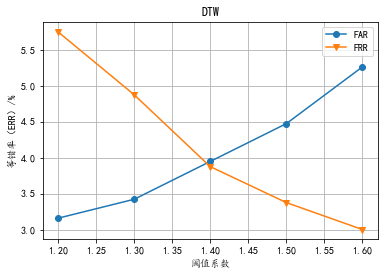

In [39]:
plt.rcParams['font.family']=['KaiTi']
plt.plot(list,far_dtw*100,marker='o',label='FAR')
plt.plot(list,frr_dtw*100,marker='v',label='FRR')
plt.title("DTW")
# plt.xticks(list)
# plt.yticks(list)
plt.grid()
plt.xlabel("阈值系数")
plt.ylabel("等错率（ERR）/%")
plt.legend()